# Лабораторная работа №6. Линейная регрессия

Выполните следующие задания:

1. Открыл в файл в Google Colab (используйте собственный форк репозитория).
2. Решил задачи.
3. Сохранил результат  репозиторий github в директорию ./les06
4. Создал pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдал работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [65]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [66]:
# Выводим основную информацию о наборе данных
print("НАБОР ДАННЫХ: Diabetes")
print(f"Количество образцов: {diabetes.data.shape[0]}")
print(f"Количество признаков: {diabetes.data.shape[1]}")
print(f"Размерность целевой переменной: {diabetes.target.shape[0]} значений")

print("\nОПИСАНИЕ ПРИЗНАКОВ:")
print("Целевая переменная (target): количественный показатель прогрессирования заболевания через год после анализов")
print("\nПризнаки (features):")
features_info = [
    "age - возраст в годах",
    "sex - пол",
    "bmi - индекс массы тела",
    "bp - среднее кровяное давление",
    "s1 - tc, общий холестерин сыворотки",
    "s2 - ldl, липопротеины низкой плотности",
    "s3 - hdl, липопротеины высокой плотности",
    "s4 - tch, общий холестерин / HDL",
    "s5 - ltg, возможно логарифм уровня триглицеридов в сыворотке",
    "s6 - glu, уровень сахара в крови"
]

for info in features_info:
    print(f"  • {info}")

print("\nПРИМЕЧАНИЕ: Все 10 признаков центрированы и масштабированы")
print("Наименования признаков в наборе данных:")
print(diabetes.feature_names)

НАБОР ДАННЫХ: Diabetes
Количество образцов: 442
Количество признаков: 10
Размерность целевой переменной: 442 значений

ОПИСАНИЕ ПРИЗНАКОВ:
Целевая переменная (target): количественный показатель прогрессирования заболевания через год после анализов

Признаки (features):
  • age - возраст в годах
  • sex - пол
  • bmi - индекс массы тела
  • bp - среднее кровяное давление
  • s1 - tc, общий холестерин сыворотки
  • s2 - ldl, липопротеины низкой плотности
  • s3 - hdl, липопротеины высокой плотности
  • s4 - tch, общий холестерин / HDL
  • s5 - ltg, возможно логарифм уровня триглицеридов в сыворотке
  • s6 - glu, уровень сахара в крови

ПРИМЕЧАНИЕ: Все 10 признаков центрированы и масштабированы
Наименования признаков в наборе данных:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [67]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print("ПЕРВЫЕ 5 СТРОК ДАННЫХ:")
print(df.head())

ПЕРВЫЕ 5 СТРОК ДАННЫХ:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [68]:
print("ИНФОРМАЦИЯ О ТИПАХ ДАННЫХ:")
print("=" * 50)
df.info()
print("\nПРОВЕРКА НА NULL ЗНАЧЕНИЯ:")
print(df.isnull().sum())
print(f"\nКатегориальные признаки: {'присутствуют' if df.select_dtypes(include=['object']).shape[1] > 0 else 'отсутствуют'}")
print(f"Null значения: {'присутствуют' if df.isnull().sum().sum() > 0 else 'отсутствуют'}")

ИНФОРМАЦИЯ О ТИПАХ ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB

ПРОВЕРКА НА NULL ЗНАЧЕНИЯ:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Категориальные признаки: отсутствуют
Null значения: отсутствуют


## Исследование данных

4. Постройте матрицу корреляции.

ЗАДАНИЕ 4: Матрица корреляции
Корреляции с целевой переменной:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


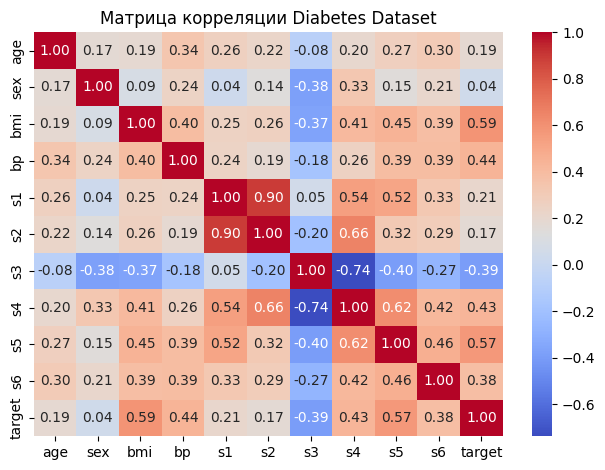

In [69]:
# 4. Постройте матрицу корреляции (простой seaborn)

print("ЗАДАНИЕ 4: Матрица корреляции")

correlation_matrix = df.corr()
print("Корреляции с целевой переменной:")
print(correlation_matrix['target'].sort_values(ascending=False))

# Просто seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции Diabetes Dataset')
plt.tight_layout()
plt.show()

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.


ЗАДАНИЕ 5: Диаграмма рассеяния
Признак с самой высокой корреляцией: bmi
Коэффициент корреляции: 0.5865


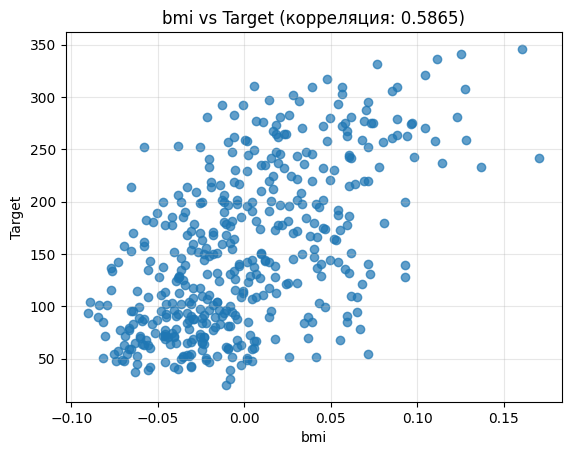

In [70]:
import numpy as np
import pandas as pd

# Затем задание 5
print("\n" + "=" * 60)
print("ЗАДАНИЕ 5: Диаграмма рассеяния")
print("=" * 60)

target_correlations = correlation_matrix['target'].drop('target')
most_correlated_feature = target_correlations.idxmax()
max_correlation = target_correlations.max()

print(f"Признак с самой высокой корреляцией: {most_correlated_feature}")
print(f"Коэффициент корреляции: {max_correlation:.4f}")

plt.scatter(df[most_correlated_feature], df['target'], alpha=0.7)
plt.xlabel(most_correlated_feature)
plt.ylabel('Target')
plt.title(f'{most_correlated_feature} vs Target (корреляция: {max_correlation:.4f})')
plt.grid(True, alpha=0.3)
plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [71]:
top_5_features = target_correlations.nlargest(5).index.tolist()
print("ТОП-5 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ:")
for i, feature in enumerate(top_5_features, 1):
    correlation = target_correlations[feature]
    print(f"{i}. {feature}: {correlation:.4f}")

X = df[top_5_features]
y = df['target']

print(f"\nФорма набора признаков X: {X.shape}")
print(f"Форма целевого значения y: {y.shape}")

ТОП-5 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ:
1. bmi: 0.5865
2. s5: 0.5659
3. bp: 0.4415
4. s4: 0.4305
5. s6: 0.3825

Форма набора признаков X: (442, 5)
Форма целевого значения y: (442,)


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("РАЗДЕЛЕНИЕ ДАННЫХ:")
print("=" * 50)
print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")
print(f"Количество признаков: {X_train.shape[1]}")

РАЗДЕЛЕНИЕ ДАННЫХ:
Обучающая выборка: 331 samples
Тестовая выборка: 111 samples
Количество признаков: 5


8. Выполните обучение модели.

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("ОБУЧЕНИЕ МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ:")
print("=" * 50)
print("Модель успешно обучена!")
print("\nКоэффициенты модели:")
for feature, coef in zip(top_5_features, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Свободный член (intercept): {model.intercept_:.4f}")

ОБУЧЕНИЕ МОДЕЛИ ЛИНЕЙНОЙ РЕГРЕССИИ:
Модель успешно обучена!

Коэффициенты модели:
  bmi: 617.3449
  s5: 406.1149
  bp: 311.9578
  s4: 103.5398
  s6: 18.9067
Свободный член (intercept): 151.6484


## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [74]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("ROOT MEAN SQUARED ERROR (RMSE):")
print("=" * 50)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

ROOT MEAN SQUARED ERROR (RMSE):
MSE: 2773.49
RMSE: 52.66


10. Расчитайте R² (коэффициент детерминации)

R² (КОЭФФИЦИЕНТ ДЕТЕРМИНАЦИИ):
R²: 0.4984
Модель объясняет 49.8% дисперсии целевой переменной


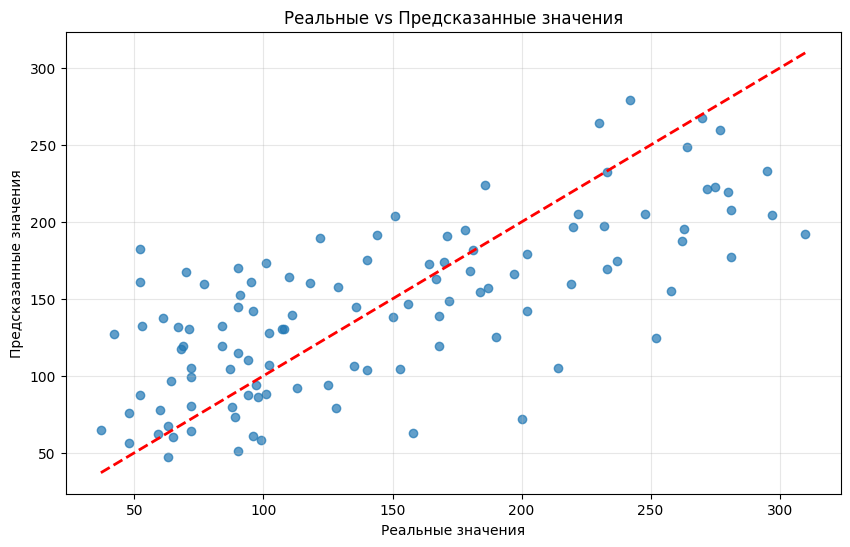

In [75]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print("R² (КОЭФФИЦИЕНТ ДЕТЕРМИНАЦИИ):")
print("=" * 50)
print(f"R²: {r2:.4f}")
print(f"Модель объясняет {r2*100:.1f}% дисперсии целевой переменной")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные vs Предсказанные значения')
plt.grid(True, alpha=0.3)
plt.show()

## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?
2. Чем отличается обучение с учителем и без учителя?
3. Чем пакетное обучение отличается от динамического?
4. Чем обучение на основе образцов отличается от обучения на основе модели?
5. Что такое линейная регрессия?
6. Что такое градиентный спуск?
7. Как правильно обрабатывать категориальные признаки?
8. Что такое матрица корреляции?
9. Что показывает метрика RMSE?
10. Что показывает метрика R²?


## 1. Какие типы машинного обучения вы знаете?

- **Обучение с учителем (Supervised Learning)** - когда есть размеченные данные (метки)
  - Классификация (категориальные метки)
  - Регрессия (числовые метки)

- **Обучение без учителя (Unsupervised Learning)** - когда нет размеченных данных
  - Кластеризация
  - Снижение размерности

- **Обучение с подкреплением (Reinforcement Learning)** - обучение через взаимодействие со средой
- **Полу-контролируемое обучение (Semi-supervised Learning)** - комбинация размеченных и неразмеченных данных

## 2. Чем отличается обучение с учителем и без учителя?

| Обучение с учителем | Обучение без учителя |
|---------------------|---------------------|
| Есть правильные ответы (метки) | Нет правильных ответов |
| Модель учится предсказывать | Модель ищет закономерности |
| Пример: прогноз цены акций | Пример: группировка клиентов |
| Оценка по точности предсказаний | Оценка по качеству кластеров |

## 3. Чем пакетное обучение отличается от динамического?

**Пакетное обучение (Batch Learning):**
- Обучение на всем наборе данных за один раз
- Требует много памяти и вычислительных ресурсов
- Обучение происходит offline
- Пример: классическое машинное обучение

**Динамическое обучение (Online/Incremental Learning):**
- Постепенное обучение на новых данных
- Меньшие требования к памяти
- Обучение происходит online в реальном времени
- Пример: рекомендательные системы

## 4. Чем обучение на основе образцов отличается от обучения на основе модели?

**Обучение на основе образцов (Instance-based):**
- Запоминает тренировочные примеры
- Для предсказания сравнивает с похожими примерами
- Медленное предсказание, быстрое обучение
- Пример: k-ближайших соседей (k-NN)

**Обучение на основе модели (Model-based):**
- Строит математическую модель
- Обобщает закономерности из данных
- Быстрое предсказание, медленное обучение
- Пример: линейная регрессия, нейронные сети

## 5. Что такое линейная регрессия?

Линейная регрессия - это статистический метод для моделирования линейной зависимости между независимыми переменными (признаками) и зависимой переменной (целевым значением).

**Формула:** y = w₁x₁ + w₂x₂ + ... + wₙxₙ + b

Где:
- y - целевая переменная
- x₁...xₙ - признаки
- w₁...wₙ - коэффициенты (weights)
- b - свободный член (bias)

## 6. Что такое градиентный спуск?

Градиентный спуск - это оптимизационный алгоритм для нахождения минимума функции потерь.

**Принцип работы:**
1. Вычисляется градиент функции потерь (направление наискорейшего роста)
2. Делается шаг в противоположном направлении
3. Процесс повторяется до сходимости

**Типы:**
- Пакетный градиентный спуск (использует все данные)
- Стохастический градиентный спуск (использует один пример)
- Мини-пакетный градиентный спуск (использует небольшие группы)

## 7. Как правильно обрабатывать категориальные признаки?

**One-Hot Encoding:**
- Создание бинарных признаков для каждой категории
- Подходит для любых моделей
- Может создать много новых признаков

**Label Encoding:**
- Присвоение числовых меток (0, 1, 2, ...)
- Только для tree-based моделей
- Может создать ложный порядок

**Target Encoding:**
- Замена категории средним значением целевой переменной
- Эффективно, но требует осторожности с переобучением

**Frequency Encoding:**
- Замена категории частотой ее появления
- Сохраняет информацию о распространенности

## 8. Что такое матрица корреляции?

Матрица корреляции - это таблица, показывающая коэффициенты корреляции Пирсона между переменными.

**Значения коэффициента:**
- **+1**: Полная прямая корреляция
- **0**: Отсутствие корреляции
- **-1**: Полная обратная корреляция

**Интерпретация:**
- 0.7-1.0: Сильная прямая корреляция
- 0.3-0.7: Умеренная корреляция
- 0.0-0.3: Слабая корреляция

## 9. Что показывает метрика RMSE?

**RMSE (Root Mean Squared Error)** - среднеквадратичная ошибка.

**Формула:** RMSE = √(Σ(yᵢ - ŷᵢ)² / n)

**Что показывает:**
- Среднее расстояние между предсказанными и реальными значениями
- Измеряется в единицах целевой переменной
- Чувствительна к выбросам
- Чем меньше значение - тем лучше модель

## 10. Что показывает метрика R²?

**R² (коэффициент детерминации)** - показывает долю дисперсии зависимой переменной, объясненную моделью.

**Формула:** R² = 1 - (SS_res / SS_tot)

**Интерпретация:**
- **1**: Модель идеально объясняет данные
- **0.7-0.9**: Очень хорошее объяснение
- **0.5-0.7**: Хорошее объяснение
- **0.3-0.5**: Удовлетворительное объяснение
- **0-0.3**: Слабое объяснение
- **<0**: Модель хуже простого среднего значения

**В нашей работе:** R² = 0.4984 означает, что модель объясняет 49.8% дисперсии прогрессирования диабета.